# THE "HELLO WORLD" OF MACHINE LEARNING - MNIST CLASSIFICATION

## Training the Model

### 1: Import Required Module(s)

In [1]:
# TensorFlow is a machine learning framework on top of which the Keras API is built off
import tensorflow as tf

2025-09-08 01:04:42.560904: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-08 01:04:42.981164: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-09-08 01:04:42.981217: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-09-08 01:04:42.983878: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-09-08 01:04:43.225298: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-08 01:04:43.229031: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

### 2: Load the Images and Labels
For now, we only need the training dataset. \
It is crucial that the training dataset and the testing dataset are never combined in any capacity.

In [2]:
# The images are what is fed into the model as input. All images are just arrays of pixel values (e.g., RGBA).
# The labels correspond to the digit 0-9 represented in each image. These are used to both train the model and compare its answers.
(training_images, training_labels), _ = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


### 3: Data Preprocessing

In [3]:
# Cast the images from using unsigned 8-bit integers to 32-bit floats, then normalize.
# This step alone increases the final accuracy of the model by approximately 5% of the dataset.
training_images = training_images.astype('float32') / 255

### 4: Create the Model

In [4]:
# Since we are building a fairly straightforward model, we can use the Sequential API provided by Keras.
# For more complex models, use the Functional API.
model = tf.keras.models.Sequential([
    # The input layer is of the same dimension as the images. MNIST uses 28x28 pixel images.
    tf.keras.layers.Flatten(input_shape=(28,28)),
    # The hidden layer(s), or "meat" of the neural network. In general, more hidden layers means a more capable or complex network.
    tf.keras.layers.Dense(128, activation='relu'),
    # For classification, the number of nodes in the output layer corresponds to the number of categories, or in this case, digits.
    tf.keras.layers.Dense(10)                      
])

### 5: Compile the Model

In [5]:
# Build the model with the selected optimizer, loss function, and metrics to analyze during training.
model.compile(
    # Determines how model weights are updated in response to the loss function.
    optimizer=tf.keras.optimizers.Adam(0.001),                            
    # Determines how harshly to penalize incorrect model predictions.
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    # Metrics do not update model weights. They are only used for callbacks and sanity checks.
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],               
)

### 6: Train the Model

In [6]:
# Specify input and target values to the model, along with parameters such as batch size.
history = model.fit(
    training_images,        # The images for the model to train on.
    training_labels,        # The correct labels for the training images.
    batch_size=2**7,        # Number of samples before the model updates its parameters.
    epochs=6,               # How many times the model runs over a dataset.
    validation_split=0.20,  # The percentage of training data to be used as validation data.
    shuffle=True            # Boolean indicating whether the input should be shuffled between each epoch.
)

Epoch 1/6
375/375 [==============================] - 2s 3ms/step - loss: 0.4002 - sparse_categorical_accuracy: 0.8906 - val_loss: 0.2124 - val_sparse_categorical_accuracy: 0.9418
Epoch 2/6
375/375 [==============================] - 1s 3ms/step - loss: 0.1895 - sparse_categorical_accuracy: 0.9461 - val_loss: 0.1595 - val_sparse_categorical_accuracy: 0.9546
Epoch 3/6
375/375 [==============================] - 1s 3ms/step - loss: 0.1390 - sparse_categorical_accuracy: 0.9598 - val_loss: 0.1329 - val_sparse_categorical_accuracy: 0.9627
Epoch 4/6
375/375 [==============================] - 1s 3ms/step - loss: 0.1092 - sparse_categorical_accuracy: 0.9686 - val_loss: 0.1145 - val_sparse_categorical_accuracy: 0.9672
Epoch 5/6
375/375 [==============================] - 1s 3ms/step - loss: 0.0886 - sparse_categorical_accuracy: 0.9751 - val_loss: 0.1050 - val_sparse_categorical_accuracy: 0.9683
Epoch 6/6
375/375 [==============================] - 1s 3ms/step - loss: 0.0731 - sparse_categorical_accu

## Evaluating the Model

### 1: Import Required Module(s)

In [7]:
# NumPy is an advanced, highly optimized mathematical library
import numpy as np
# Matplotlib is a plotting module that allows us to easily visualize data.
from matplotlib import pyplot as plt

### 2: Load the Images and Labels
Now, we need the testing dataset.

In [8]:
# In testing, only the images are provided to the model, not the labels.
# The labels now are for the user to compare with the models' predictions.
_, (testing_images, testing_labels) = tf.keras.datasets.mnist.load_data()

### 3: Data Preprocessing (notice a pattern?)
It is crucial that the testing data is processed exactly the same as the training data. \
Otherwise, the results of the model will be misleading.

In [9]:
# Once again, cast the images from using unsigned 8-bit integers to 32-bit floats, then normalize.
testing_images = testing_images.astype('float32') / 255

### 4: Predict Testing Data

In [10]:
# As mentioned previously, only the testing images are provided to the model for predictions.
# Providing the labels would be cheating! Providing training data would also be cheating, since the model has already seen those images.
predictions = model.predict(testing_images)

313/313 [==============================] - 0s 1ms/step


### 5: Process Predictions

In [11]:
# The format of the predictions output matches the format of the output of the model.
# Since the model has 10 output nodes, the result of each prediction is a list of 10 elements.
# The way to intepret this prediction list is that each element is a likelihood value corresponding to each possible output category, or digit.
# The index of each likelihood value in the list corresponds to the digit whose likelihood it is representing.
# High-magnitude likelihood values correspond to strong model confidence in that particular category.
# Positive likelihood values indicate the model "agrees" with a particular digit, and vice-versa.
# The digit that the model predicts for each image is the one with the most positive likelihood value.
discretized_predictions = np.argmax(predictions, axis=1)

### 6: Analyze Results
We have arrived to the final step in the machine learning process - assessing model performance on unseen data. \
This is mostly a sandbox at this point where we try to look for trends in the output.

#### Total Accuracy

In [12]:
num_predictions = len(discretized_predictions)
num_successful_predictions = sum(discretized_predictions == testing_labels)

print(f'Total Accuracy:  {100 * num_successful_predictions / num_predictions:.2f}%')

Total Accuracy:  97.23%


#### Category Specific Accuracy

In [13]:
for digit in range(10):
    digit_specific_image_ids = testing_labels == digit
    num_digit_specific_predictions = sum(digit_specific_image_ids)
    num_successful_digit_specific_predictions = sum(discretized_predictions[digit_specific_image_ids] == testing_labels[digit_specific_image_ids])

    print(f'Accuracy for {digit}:  {100 * num_successful_digit_specific_predictions / num_digit_specific_predictions:.2f}%')

Accuracy for 0:  98.88%
Accuracy for 1:  98.94%
Accuracy for 2:  97.97%
Accuracy for 3:  98.12%
Accuracy for 4:  97.76%
Accuracy for 5:  96.52%
Accuracy for 6:  97.29%
Accuracy for 7:  95.91%
Accuracy for 8:  94.97%
Accuracy for 9:  95.64%


#### Correct Predictions

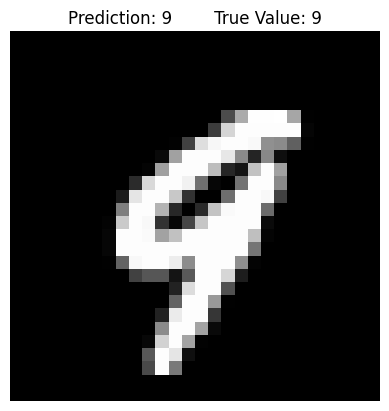

In [14]:
correct_prediction_image_ids = np.nonzero(discretized_predictions == testing_labels)[0]

random_correct_image_id = np.random.choice(correct_prediction_image_ids)

plt.axis('off')
plt.title(f'Prediction: {discretized_predictions[random_correct_image_id]}        True Value: {testing_labels[random_correct_image_id]}')
plt.imshow(testing_images[random_correct_image_id].reshape(28,28), cmap='gray')
plt.show()

#### Identifying Problematic Inputs

In [15]:
incorrect_prediction_image_ids = np.nonzero(discretized_predictions != testing_labels)[0]

print(incorrect_prediction_image_ids)

[  61  115  124  247  259  321  340  445  495  582  591  619  659  684
  691  707  717  720  740  810  839  882  938  947  951  956  965 1003
 1014 1039 1044 1112 1181 1182 1194 1226 1232 1242 1247 1260 1319 1326
 1328 1364 1378 1393 1425 1433 1494 1496 1500 1522 1530 1549 1553 1609
 1670 1681 1709 1717 1751 1754 1773 1790 1800 1828 1850 1878 1901 1941
 1952 1955 1984 2004 2016 2024 2033 2035 2040 2052 2053 2070 2098 2109
 2118 2129 2130 2135 2182 2189 2224 2272 2293 2333 2387 2395 2406 2414
 2422 2488 2526 2607 2648 2654 2760 2771 2810 2877 2896 2915 2939 2953
 2995 3005 3060 3073 3110 3115 3117 3206 3333 3422 3490 3503 3520 3558
 3559 3567 3597 3604 3674 3681 3751 3757 3767 3780 3808 3811 3818 3838
 3853 3869 3893 3902 3906 3926 3941 3943 3976 3985 4063 4065 4075 4078
 4163 4176 4193 4199 4224 4248 4271 4289 4294 4306 4360 4369 4380 4419
 4425 4433 4497 4536 4601 4639 4731 4807 4814 4823 4837 4880 4886 4956
 4966 5176 5331 5457 5600 5634 5642 5676 5734 5749 5887 5888 5926 5936
 5937 

#### How Much Better Can WE Do?

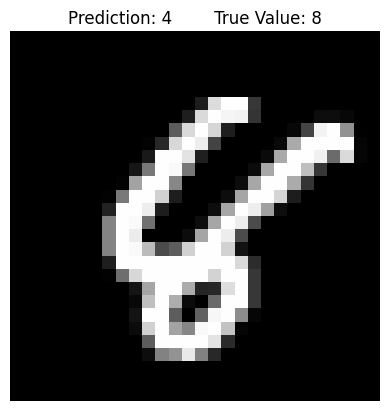

In [16]:
random_incorrect_image_id = np.random.choice(incorrect_prediction_image_ids)

plt.axis('off')
plt.title(f'Prediction: {discretized_predictions[random_incorrect_image_id]}        True Value: {testing_labels[random_incorrect_image_id]}')
plt.imshow(testing_images[random_incorrect_image_id].reshape(28,28), cmap='gray')
plt.show()

# Interactive Website:
# playground.tensorflow.org